In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\study\ML\Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(500, 9)

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1) 

In [12]:
X_train.shape

(400, 7)

In [13]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [14]:
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [19]:
history = model.fit(X_train_scaled,y_train,epochs=1000,validation_split=0.2)

Epoch 1/1000

10/10 [==============================] - 2s 40ms/step - loss: 0.5130 - val_loss: 0.5516
Epoch 2/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.4801 - val_loss: 0.5135
Epoch 3/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.4375 - val_loss: 0.4609
Epoch 4/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.3658 - val_loss: 0.3799
Epoch 5/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2884 - val_loss: 0.2886
Epoch 6/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2136 - val_loss: 0.2049
Epoch 7/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1491 - val_loss: 0.1396
Epoch 8/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1020 - val_loss: 0.0963
Epoch 9/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0779 - val_loss: 0.0763
Epoch 10/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0676 - val_lo

10/10 [==============================] - 0s 10ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 80/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 81/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 82/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 83/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 84/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 85/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 86/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 87/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 88/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0046


10/10 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 160/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 161/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 162/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 163/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 164/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 165/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 166/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 167/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 168/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss:

10/10 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 240/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 241/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 242/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 243/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 244/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 245/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 246/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 247/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 248/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss:

10/10 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 320/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 321/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 322/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 323/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 324/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 325/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 326/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 327/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 328/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.

10/10 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 400/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 401/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 402/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 403/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 404/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 405/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 406/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 407/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 408/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0

10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 480/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 481/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 482/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 483/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 484/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 485/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 486/1000
10/10 [==============================] - 0s 18ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 487/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 488/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss

10/10 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 560/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 561/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 562/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 563/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 564/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 565/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 566/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 567/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 568/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_los

10/10 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 640/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 641/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 642/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 643/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 644/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 645/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 646/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 647/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 648/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.

10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 720/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 721/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 722/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 723/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 724/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 725/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 726/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 727/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 728/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss:

10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 800/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 801/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 802/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 803/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 804/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 805/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 806/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 807/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 808/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss:

10/10 [==============================] - 0s 12ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 880/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 881/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 882/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 883/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 884/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 885/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 886/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 887/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 888/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss:

10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 960/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 961/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 962/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 963/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 964/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 965/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 966/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 967/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 968/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0034 - val_loss

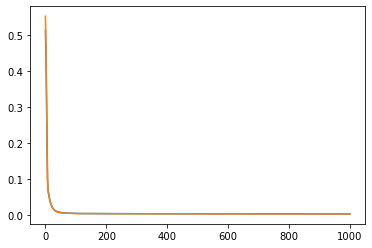

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [21]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8328919832295456